### Import Libriries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data Load

In [2]:
df = pd.read_csv("googleplaystore.csv")

### Data Understnding

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB
None


In [4]:
df.shape

(10841, 13)

In [5]:
print(df.isnull().sum())

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


In [6]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [7]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


### Data Cleaning

##### NOT Important

In [8]:
df = df.drop([ "Current Ver"], axis=1)

In [9]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Android Ver'],
      dtype='object')

#### Delete Duplicates

In [10]:
total_duplicates = df.duplicated().sum()

print("Total duplicate rows:", total_duplicates)

Total duplicate rows: 483


In [11]:
df = df.drop_duplicates()


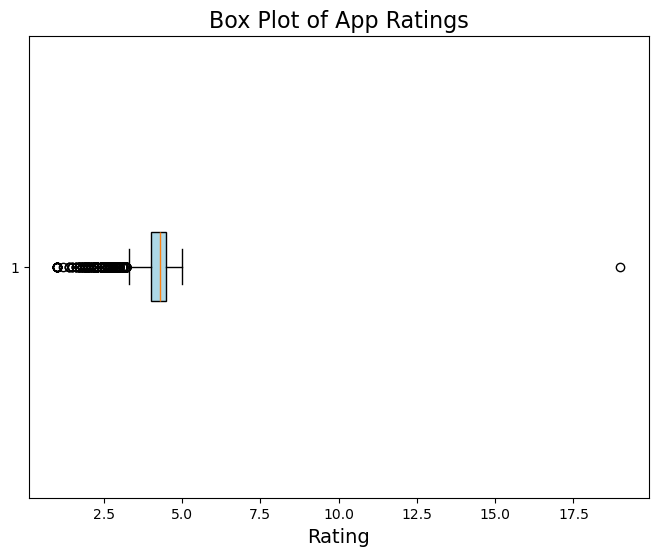

In [12]:

plt.figure(figsize=(8, 6))

plt.boxplot(df['Rating'].dropna(), vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))

plt.title('Box Plot of App Ratings', fontsize=16)
plt.xlabel('Rating', fontsize=14)
plt.show()

In [13]:
df['Rating'] = df['Rating'].fillna(df['Rating'].mean())

In [14]:
df['Type'] = df['Type'].fillna(df['Type'].mode()[0])
df['Content Rating'] = df['Content Rating'].fillna(df['Content Rating'].mode()[0])

In [15]:
print(df.isnull().sum())

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Android Ver       3
dtype: int64


#### Fixing 'Size' Column

In [16]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [17]:
#fix size
def convert_size(size):
    if 'M' in size:
        return float(size.replace('M', ''))  
    elif 'k' in size:
        return float(size.replace('k', '')) / 1024  
    elif size == 'Varies with device':
        return None  
    else:
        return None  

df['Size'] = df['Size'].apply(convert_size)

In [18]:
df['Size'] = df['Size'].fillna(df['Size'].mean())

#### Fixing 'Installs' Column

In [19]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

In [20]:
df['Installs'] =df['Installs'].str.replace('+', '')


In [21]:
df['Installs'] = df['Installs'].replace('Free', '0')


In [22]:
df['Installs'] = df['Installs'].str.replace(',', '')  # Remove commas

In [23]:
df['Installs'] = df['Installs'].astype(int)

#### Fixing 'Price' Column

In [24]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

In [25]:
df['Price'] = df['Price'].str.replace('$', '')

In [26]:
df['Price'] = df['Price'].replace('Everyone', '0')

In [27]:
df['Price'] = df['Price'].astype(float)

#### Fixing 'Reviews' Column

In [28]:
df['Reviews']

0           159
1           967
2         87510
3        215644
4           967
          ...  
10836        38
10837         4
10838         3
10839       114
10840    398307
Name: Reviews, Length: 10358, dtype: object

In [29]:
# Convert 'Reviews' column to numeric
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

In [30]:
# Convert 'Reviews' column to numeric
df['Reviews'] = df['Reviews'].fillna(df['Reviews'].median())

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10358 entries, 0 to 10840
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10358 non-null  object 
 1   Category        10358 non-null  object 
 2   Rating          10358 non-null  float64
 3   Reviews         10358 non-null  float64
 4   Size            10358 non-null  float64
 5   Installs        10358 non-null  int32  
 6   Type            10358 non-null  object 
 7   Price           10358 non-null  float64
 8   Content Rating  10358 non-null  object 
 9   Genres          10358 non-null  object 
 10  Last Updated    10358 non-null  object 
 11  Android Ver     10355 non-null  object 
dtypes: float64(4), int32(1), object(7)
memory usage: 1011.5+ KB


#### Fixing 'Category' Column

In [32]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [33]:
df['Category'] = df['Category'].str.strip().str.title()

In [34]:
print(df.isnull().sum())

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Android Ver       3
dtype: int64


#### Fixing 'Android Ver' Column

In [35]:
df['Android Ver'] = df['Android Ver'].fillna(df['Android Ver'].mode()[0])
df['Android Ver'] = df['Android Ver'].replace('Varies with device', np.nan)
df['Android Ver'] = df['Android Ver'].fillna(df['Android Ver'].mode()[0])  # Fill remaining NaN with mode


In [36]:
print(df.isnull().sum())

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Android Ver       0
dtype: int64


#### Fixing 'Last Updated' Column

In [37]:
df['Last Updated'] = pd.to_datetime(df['Last Updated'], errors='coerce')

#### Fixing 'Type' Column

In [38]:
df['Type'].unique()

array(['Free', 'Paid', '0'], dtype=object)

In [39]:
df['Type'] = df['Type'].replace({'0': 'Free'})
df['Type'] = df['Type'].astype(str).str.title() 


In [40]:
df['Type'].unique()

array(['Free', 'Paid'], dtype=object)

#### Fixing 'Content Rating' Column

In [41]:
df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [42]:
df['Content Rating'] = df['Content Rating'].str.strip()

In [43]:
df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

#### Fixing 'Genres' Column

In [44]:
df['Primary Genre'] = df['Genres'].apply(lambda x: x.split(';')[0])

In [45]:
df['Sub Genre'] = df['Genres'].apply(lambda x: x.split(';')[1] if ';' in x else None)

In [46]:

del df['Genres']

In [47]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Android Ver,Primary Genre,Sub Genre
0,Photo Editor & Candy Camera & Grid & ScrapBook,Art_And_Design,4.1,159.0,19.0,10000,Free,0.0,Everyone,2018-01-07,4.0.3 and up,Art & Design,None
1,Coloring book moana,Art_And_Design,3.9,967.0,14.0,500000,Free,0.0,Everyone,2018-01-15,4.0.3 and up,Art & Design,Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",Art_And_Design,4.7,87510.0,8.7,5000000,Free,0.0,Everyone,2018-08-01,4.0.3 and up,Art & Design,None
3,Sketch - Draw & Paint,Art_And_Design,4.5,215644.0,25.0,50000000,Free,0.0,Teen,2018-06-08,4.2 and up,Art & Design,None
4,Pixel Draw - Number Art Coloring Book,Art_And_Design,4.3,967.0,2.8,100000,Free,0.0,Everyone,2018-06-20,4.4 and up,Art & Design,Creativity


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10358 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10358 non-null  object        
 1   Category        10358 non-null  object        
 2   Rating          10358 non-null  float64       
 3   Reviews         10358 non-null  float64       
 4   Size            10358 non-null  float64       
 5   Installs        10358 non-null  int32         
 6   Type            10358 non-null  object        
 7   Price           10358 non-null  float64       
 8   Content Rating  10358 non-null  object        
 9   Last Updated    10357 non-null  datetime64[ns]
 10  Android Ver     10358 non-null  object        
 11  Primary Genre   10358 non-null  object        
 12  Sub Genre       462 non-null    object        
dtypes: datetime64[ns](1), float64(4), int32(1), object(7)
memory usage: 1.1+ MB


#### Data Analysis & Visualizations

1-Outliier

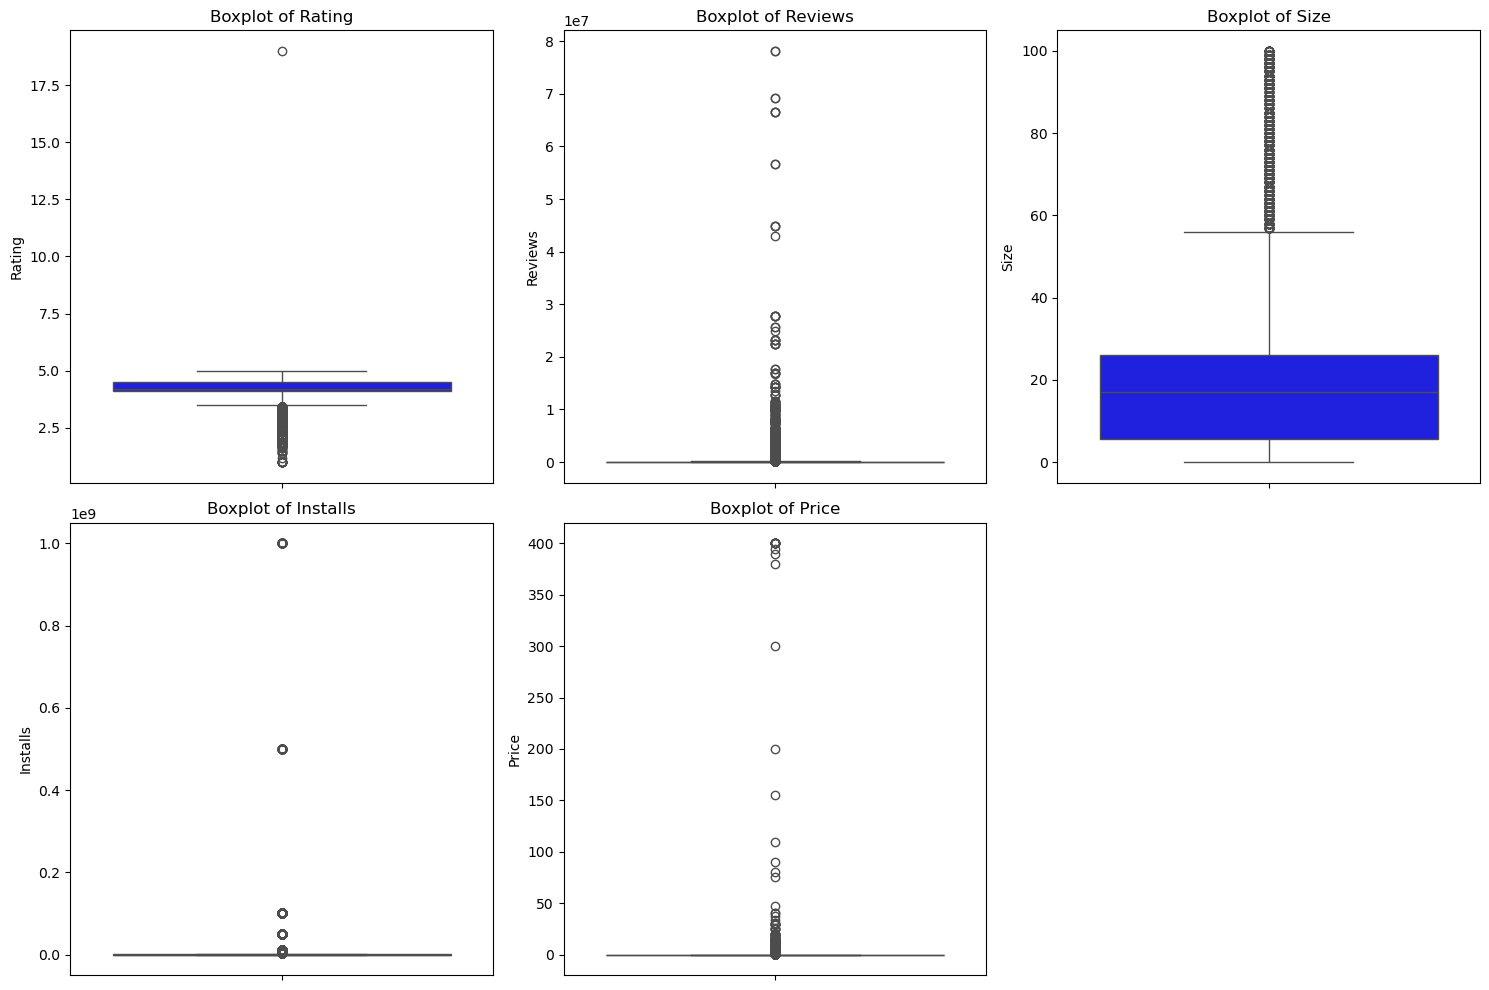

In [53]:
# List of numeric columns to plot
numeric_columns = ['Rating', 'Reviews', 'Size', 'Installs', 'Price']

# Create boxplots for each numeric column
plt.figure(figsize=(15, 10))  # Adjust the figure size

for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)  # Create a 2-row, 3-column grid for subplots
    sns.boxplot(data=df, y=col, color='blue')
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.show()

2-Rating

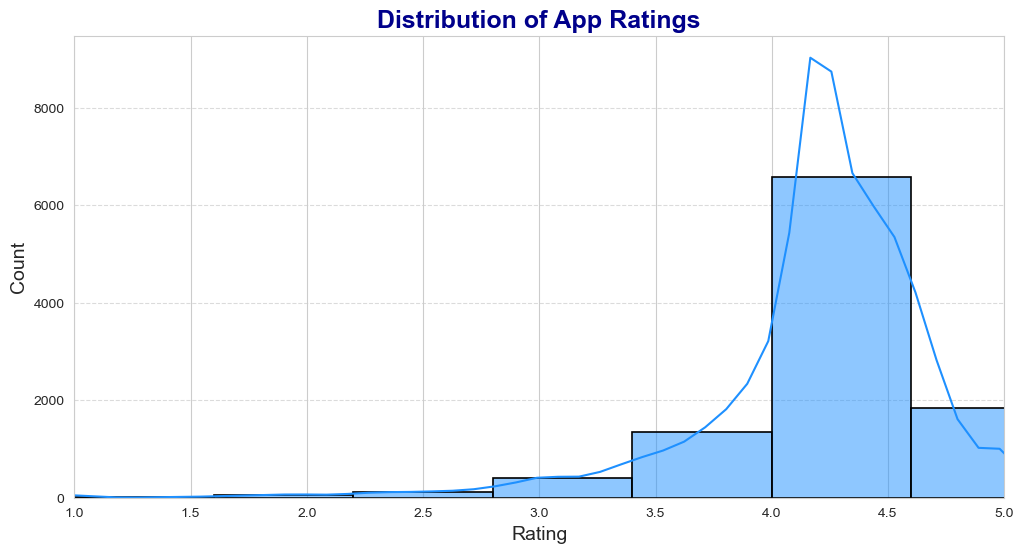

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Histogram with KDE
sns.histplot(df['Rating'], bins=30, kde=True, color='dodgerblue', edgecolor='black', linewidth=1.2)

# Titles and labels
plt.title('Distribution of App Ratings', fontsize=18, fontweight='bold', color='darkblue')
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Set x-axis range from 1 to 5
plt.xlim(1, 5)

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

3-Visualization of the amount of free to paid apps

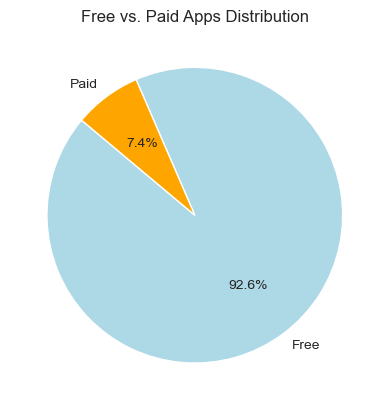

In [58]:
# Pie chart
type_counts = df['Type'].value_counts()
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'orange'])
plt.title('Free vs. Paid Apps Distribution')
plt.show()

4-Visualization of the top 10 genres

C:\Users\asus\AppData\Local\Temp\ipykernel_10748\3799385123.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_genres.index, x=top_genres.values, palette='viridis') # I have researched different ways to use barplot


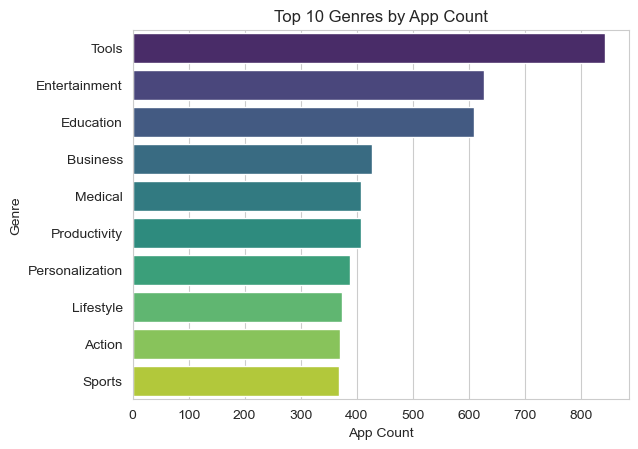

In [59]:
top_genres = df['Primary Genre'].value_counts().head(10)
sns.barplot(y=top_genres.index, x=top_genres.values, palette='viridis') # I have researched different ways to use barplot
plt.title('Top 10 Genres by App Count')
plt.xlabel('App Count')
plt.ylabel('Genre')
plt.show()

C:\Users\asus\AppData\Local\Temp\ipykernel_10748\3874760793.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


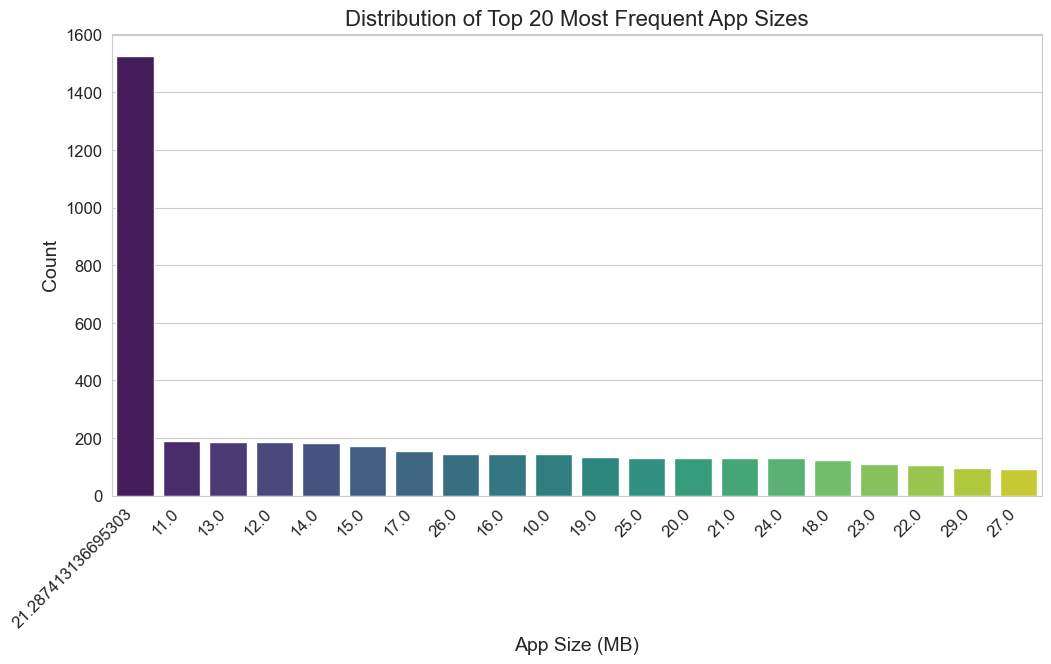

In [63]:
top_sizes = df["Size"].value_counts().nlargest(20).index

plt.figure(figsize=(12, 6))
palette = sns.color_palette("viridis", len(top_sizes))

sns.countplot(
    x="Size",
    data=df[df["Size"].isin(top_sizes)],  # Fixed: Changed df= to data=
    order=top_sizes,  
    palette=palette
)

plt.xticks(rotation=45, ha="right", fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("App Size (MB)", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title("Distribution of Top 20 Most Frequent App Sizes", fontsize=16)

plt.show()

C:\Users\asus\AppData\Local\Temp\ipykernel_10748\178213995.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_avg_rating.index, y=category_avg_rating.values, palette="coolwarm")


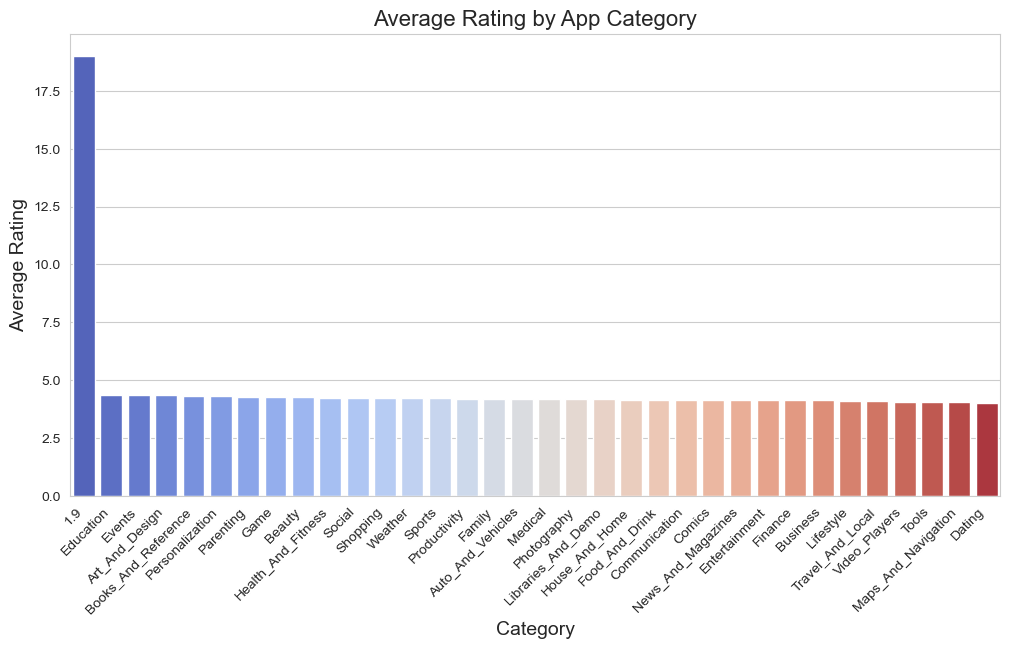

In [65]:
plt.figure(figsize=(12, 6))
category_avg_rating = df.groupby("Category")["Rating"].mean().sort_values(ascending=False)
sns.barplot(x=category_avg_rating.index, y=category_avg_rating.values, palette="coolwarm")
plt.xticks(rotation=45, ha="right")
plt.title("Average Rating by App Category", fontsize=16)
plt.xlabel("Category", fontsize=14)
plt.ylabel("Average Rating", fontsize=14)
plt.show()


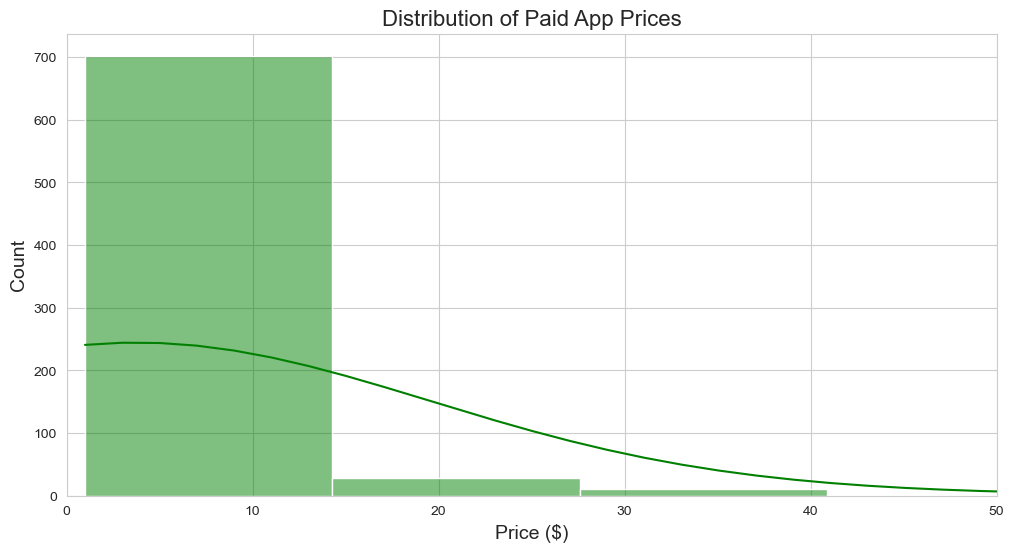

In [66]:
paid_apps = df[df["Price"] > 0]
plt.figure(figsize=(12, 6))
sns.histplot(paid_apps["Price"], bins=30, kde=True, color="green")
plt.title("Distribution of Paid App Prices", fontsize=16)
plt.xlabel("Price ($)", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xlim(0, 50)  # Limit to reasonable prices
plt.show()


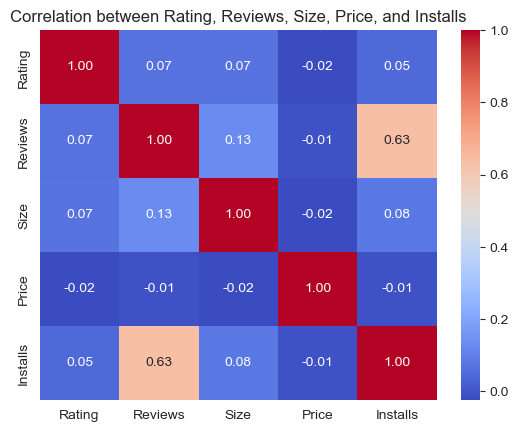

In [67]:
correlation_matrix = df[['Rating', 'Reviews', 'Size', 'Price', 'Installs']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation between Rating, Reviews, Size, Price, and Installs')
plt.show()

### Questions

1-What is the most expensive app on the Play Store?

In [70]:
most_expensive_app = df[df['Price'] == df['Price'].max()]
print(most_expensive_app[['App', 'Price']])

                           App  Price
4367  I'm Rich - Trump Edition  400.0


2-Which genre has the highest number of apps?

In [71]:
genre_counts = df['Primary Genre'].value_counts()  # Using value_counts to count each genre
top_genre = genre_counts.idxmax()
top_genre_count = genre_counts.max()
print(f"The primary genre with the highest number of apps is: {top_genre} with {top_genre_count} apps.")

subgenre_counts = df['Sub Genre'].value_counts()
top_subgenre = subgenre_counts.idxmax()
top_subgenre_count = subgenre_counts.max()
print(f"The sub genre with the highest number of apps is: {top_subgenre} with {top_subgenre_count} apps.")

The primary genre with the highest number of apps is: Tools with 843 apps.
The sub genre with the highest number of apps is: Action & Adventure with 128 apps.


3-What is the average size of free vs. paid apps?

In [73]:
average_size = df.groupby('Type')['Size'].mean()
print(average_size)

Type
Free    21.443272
Paid    19.332960
Name: Size, dtype: float64


4-What are the top 5 most expensive apps with a perfect rating (5)?

In [75]:
top_5_expensive_perfect_rating = df[df['Rating'] == 5].nlargest(5, 'Price')
print(top_5_expensive_perfect_rating[['App', 'Price', 'Rating']])

                                            App  Price  Rating
5489                  AP Art History Flashcards  29.99     5.0
7477                 USMLE Step 2 CK Flashcards  19.99     5.0
5246                      Hey AJ! It's Bedtime!   4.99     5.0
5482                 meStudying: AP English Lit   4.99     5.0
7204  TI-84 CE Graphing Calculator Manual TI 84   4.99     5.0


5-How many apps have received more than 50K reviews?

In [76]:
apps_above_50k_reviews = df[df['Reviews'] > 50000]
num_apps_above_50k = apps_above_50k_reviews.shape[0] # Shape[0] -> no. of rows
print(f"Number of apps with more than 50K reviews: {num_apps_above_50k}")

Number of apps with more than 50K reviews: 2525


6-What is the average price of apps, grouped by genre and number of installs?

In [77]:
average_price_by_genre_installs = df.groupby(['Primary Genre', 'Installs'])['Price'].mean().reset_index() 
print(average_price_by_genre_installs)

    Primary Genre  Installs     Price
0          Action        10  0.000000
1          Action        50  0.663333
2          Action       100  1.096000
3          Action       500  0.995000
4          Action      1000  0.372500
..            ...       ...       ...
707          Word    100000  0.000000
708          Word   1000000  0.000000
709          Word   5000000  0.000000
710          Word  10000000  0.000000
711          Word  50000000  0.000000

[712 rows x 3 columns]


7-How many apps have a rating higher than 4.7, and what is their average price?

In [78]:
high_rating_apps = df[df['Rating'] > 4.7]
num_high_rating_apps = high_rating_apps.shape[0]
avg_price_high_rating_apps = high_rating_apps['Price'].mean()
print(f"Number of apps with a rating higher than 4.7: {num_high_rating_apps}")
print(f"Average price of apps with a rating higher than 4.7: {avg_price_high_rating_apps}")

Number of apps with a rating higher than 4.7: 587
Average price of apps with a rating higher than 4.7: 0.45422487223168656


8-What is Google estimated revenue from apps with 5,000,000+ installs?

In [79]:
apps_above_5m_installs = df[df['Installs'] >= 5000000]
estimated_revenue = (apps_above_5m_installs['Price'] * 0.30).sum()
print(f"Estimated revenue from apps with 5,000,000+ installs: {estimated_revenue}")

Estimated revenue from apps with 5,000,000+ installs: 4.491


9-What are the maximum and minimum sizes of free vs. paid apps?


In [80]:
size_stats = df.groupby('Type')['Size'].agg(['max', 'min'])
print(size_stats)

        max       min
Type                 
Free  100.0  0.008301
Paid  100.0  0.013672


10. Is there a correlation between an app’s rating, number of reviews, size, and its price?


           Rating   Reviews      Size     Price
Rating   1.000000  0.065203  0.070138 -0.019894
Reviews  0.065203  1.000000  0.130485 -0.009416
Size     0.070138  0.130485  1.000000 -0.023757
Price   -0.019894 -0.009416 -0.023757  1.000000


<Axes: >

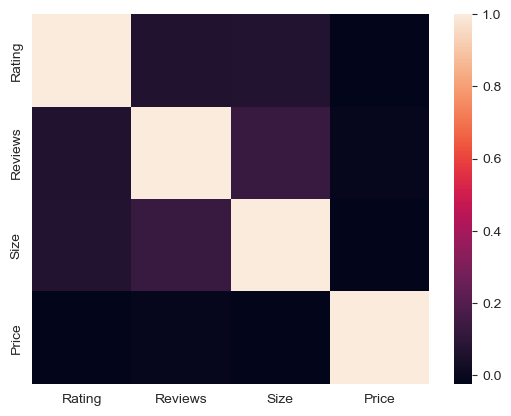

In [82]:
correlation_matrix = df[['Rating', 'Reviews', 'Size', 'Price']].corr()
print(correlation_matrix)
sns.heatmap(correlation_matrix)

11. How many apps exist for each type (free/paid) across different content ratings?


In [84]:
df['Content Rating'].unique()
apps_by_type_content_rating = df.groupby(['Type', 'Content Rating']).size().reset_index(name='App Count')
print(apps_by_type_content_rating)

   Type   Content Rating  App Count
0  Free  Adults only 18+          3
1  Free         Everyone       7721
2  Free     Everyone 10+        345
3  Free       Mature 17+        428
4  Free             Teen       1094
5  Free          Unrated          2
6  Paid         Everyone        662
7  Paid     Everyone 10+         32
8  Paid       Mature 17+         19
9  Paid             Teen         52


12. How many apps are compatible with Android version 4.x?`

In [85]:
android_4_apps = df[df['Android Ver'].str.startswith('4.', na=False)]
num_android_4_apps = android_4_apps.shape[0]
print(f"Number of apps compatible with Android version 4.x: {num_android_4_apps}")

Number of apps compatible with Android version 4.x: 7921
